# Statisical significance

This notebook applies the McNemar statical test to the UCC BERT and UCC ROBERTA classifiers to see if there is a statically signficant performance difference between them.

# Load Data

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
upload = files.upload()

Saving bert_labels_full.csv to bert_labels_full.csv


In [ ]:
ucc_bert_labels = pd.read_csv('bert_labels_full.csv')

In [ ]:
ucc_bert_labels

,_unit_id,_trusted_judgments,comment,antagonise,antagonise:confidence,condescending,condescending:confidence,dismissive,dismissive:confidence,generalisation,generalisation:confidence,generalisation_unfair,generalisation_unfair:confidence,healthy,healthy:confidence,hostile,hostile:confidence,sarcastic,sarcastic:confidence,pred_antagonise,pred_condescending,pred_dismissive,pred_generalisation,pred_generalisation_unfair,pred_healthy,pred_hostile,pred_sarcastic
0,1739464639,3,Yup. You got it.,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0000,1,1.0000,0,1.0000,0,1.0000,0.022034,0.028557,0.017920,0.017727,0.015778,0.956146,0.014747,0.034325
1,1739446479,5,The conservative vote held. It was the NDP vot...,0,1.0000,0,1.0000,0,1.0000,0,0.8041,0.0,1.0000,1,1.0000,0,1.0000,0,1.0000,0.018503,0.023120,0.015375,0.016232,0.014400,0.964393,0.013457,0.030220
2,1739456629,5,"Jimmy Carter came after Vietnam, Obama came af...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0000,1,0.7902,0,1.0000,0,1.0000,0.019224,0.024458,0.015788,0.016515,0.014938,0.962417,0.013640,0.031104
3,2319158119,4,Would vote for Trump over Wynne.,0,0.7529,0,0.7529,0,0.7529,0,0.7529,0.0,1.0000,1,1.0000,0,0.7529,0,1.0000,0.018202,0.022871,0.015217,0.016098,0.014401,0.965128,0.013395,0.029908
4,1739470049,5,"'Parliament should decide.'In other words, 'Le...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0000,1,0.7988,0,1.0000,0,0.6068,0.034063,0.047788,0.022885,0.025588,0.021418,0.929389,0.018337,0.046833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1739469919,5,It puts an end to the old socialist lie that w...,0,0.5997,1,0.6129,0,0.5997,1,0.6129,1.0,0.6129,1,0.5997,0,0.5997,0,1.0000,0.018338,0.022955,0.015342,0.016065,0.014518,0.964353,0.013424,0.030652
4421,2164632169,6,"The pensioners ARE the sponsors! Gt a grip, Art!",1,0.6726,1,0.6726,1,1.0000,0,0.8303,0.0,1.0000,0,0.5029,1,0.6726,0,0.6694,0.176650,0.152090,0.097196,0.040670,0.046969,0.768840,0.075043,0.101823
4422,1739446039,3,He was told not to move and he didn't obey. To...,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0000,1,1.0000,0,1.0000,0,1.0000,0.140081,0.145380,0.060753,0.050493,0.051697,0.810768,0.065580,0.097383
4423,1739459009,5,Would you respect the right of your daughter t...,0,0.5954,0,0.5954,0,0.5954,0,0.8026,0.0,1.0000,1,0.5954,0,0.5954,0,0.8026,0.019053,0.024221,0.015978,0.016076,0.014704,0.963412,0.013547,0.030622


In [ ]:
# make healthy -> unhealthy and flip predictions as this makes all positives labels the minority class
import numpy as np
ucc_bert_labels['unhealthy'] = np.where(ucc_bert_labels['healthy'] == 1, 0, 1)
pred_unhealthy = []
for index,row in ucc_bert_labels.iterrows():
  pred_unhealthy.append(1 - row['pred_healthy'])
print(len(pred_unhealthy))
ucc_bert_labels['pred_unhealthy'] = pred_unhealthy

4425


In [ ]:
attributes = ['antagonise', 'condescending', 'dismissive', 'generalisation',
              'generalisation_unfair', 'unhealthy', 'hostile', 'sarcastic',]
pred_headers = []
for attribute in attributes:
  pred_headers.append('pred_'+attribute)
pred_headers

['pred_antagonise',
 'pred_condescending',
 'pred_dismissive',
 'pred_generalisation',
 'pred_generalisation_unfair',
 'pred_unhealthy',
 'pred_hostile',
 'pred_sarcastic']

UCC ROBERTa

In [ ]:
ucc_roberta_labels_path = '/content/drive/MyDrive/final project/stat significance/ucc_roberta_labels.csv'

In [ ]:
ucc_roberta_labels = pd.read_csv(ucc_roberta_labels_path)

# Test AUC Scores

roc auc

Text(0.5, 1.0, 'RoBERTa Trained on UCC Datatset - AUC ROC')

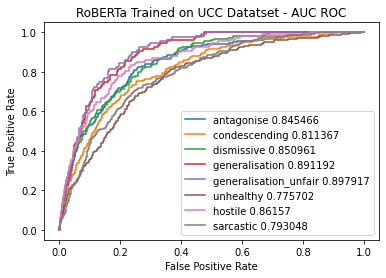

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
for i, attribute in enumerate(attributes):
  fpr, tpr, _ = metrics.roc_curve(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_roberta_labels[pred_headers])[:, i])
  auc = metrics.roc_auc_score(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_roberta_labels[pred_headers])[:, i])
  plt.plot(fpr, tpr, label='%s %g' % (attribute, auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Datatset - AUC ROC')

Text(0.5, 1.0, 'RoBERTa Trained on UCC Datatset - AUC ROC')

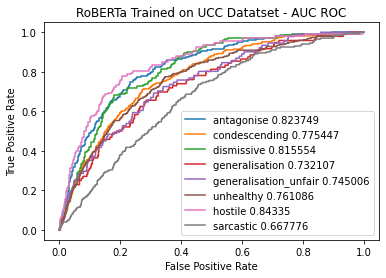

In [ ]:
from sklearn import metrics
plt.figure()
for i, attribute in enumerate(attributes):
  fpr, tpr, _ = metrics.roc_curve(
      np.array(ucc_roberta_labels[attributes])[:,i].astype(int), np.array(ucc_bert_labels[pred_headers])[:, i])
  auc = metrics.roc_auc_score(
      np.array(ucc_roberta_labels[attributes])[:,i].astype(int), np.array(ucc_bert_labels[pred_headers])[:, i])
  plt.plot(fpr, tpr, label='%s %g' % (attribute, auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Datatset - AUC ROC')

precision-recall auc

Text(0.5, 1.0, 'RoBERTa Trained on UCC Datatset - AUC ROC')

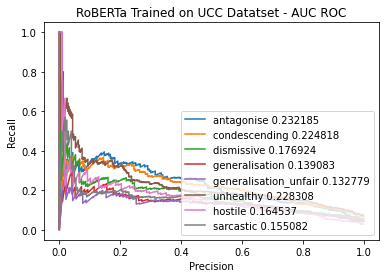

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
for i, attribute in enumerate(attributes):
  pr, re, _ = metrics.precision_recall_curve(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_roberta_labels[pred_headers])[:, i])
  auc = metrics.average_precision_score(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_roberta_labels[pred_headers])[:, i])
  plt.plot(re, pr, label='%s %g' % (attribute, auc))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Datatset - AUC ROC')

Text(0.5, 1.0, 'RoBERTa Trained on UCC Datatset - AUC ROC')

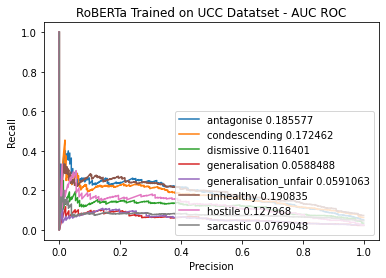

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()
for i, attribute in enumerate(attributes):
  pr, re, _ = metrics.precision_recall_curve(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_bert_labels[pred_headers])[:, i])
  auc = metrics.average_precision_score(
      np.array(ucc_bert_labels[attributes])[:,i].astype(int), np.array(ucc_bert_labels[pred_headers])[:, i])
  plt.plot(re, pr, label='%s %g' % (attribute, auc))
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.title('RoBERTa Trained on UCC Datatset - AUC ROC')

# McNemar test - with Sensitivity 
Sensitivity = Pr(+classified positive|displaying positive attribute)
In this, two classifer tests are administered to same test comments. Each comment may be broken down into individual labels - 8 per comment. Consider two populations of labels N1 being a positive label and N2 being a negative label.
The N2 labels without a positive UCC attribute are set aside and only the N1  labels are used in the analysis, this is because this is the case of interest - we are not considering accuracy. The results can be displayed in a 2x2 tables with 4 values: A, B, C and D.

Where A = a positive label both models correctly predicted
Where B = a positive label only model 1 correctly predicted
Where C = a positive label only model 2 correctly predicted
Where D = a positive label neither model correctly predicted

The McNemar test statistic is:

χ1 = (B - C)^2 / B + C

The null hypothesis that the sensitivities of the two tests are equal, that P(a+b) = P(a+c) is equivalent to the hypothesis that P(b) = P(c). The alternative hypothesis is that P(b) ≠ P(c).

In [ ]:
def mcnemar_sensitivity_test(attribute_ix, y_true, y_pred_1, y_pred_2):
  both_TP, model_1_TP, model_2_TP, both_FN = 0,0,0,0
  att_,pred_ = attributes[attribute_ix], pred_headers[attribute_ix]
  for i in range(len(y_true)):
      correct_label = y_true.iloc[i][att_]
      model_1_pred = np.round(y_pred_1.iloc[i][pred_])
      model_2_pred = np.round(y_pred_2.iloc[i][pred_])
      # only interested in positive case
      if correct_label == 1:
        if model_1_pred == correct_label and model_2_pred == correct_label:
          both_TP+=1
        if model_1_pred == correct_label and model_2_pred != correct_label:
          model_1_TP+=1
        if model_1_pred != correct_label and model_2_pred == correct_label:
          model_2_TP+=1
        if model_1_pred != correct_label and model_2_pred != correct_label:
          both_FN+=1
  return both_TP, model_1_TP, model_2_TP, both_FN

mcnemar_sensitivity_test(0, ucc_bert_labels[attributes], ucc_roberta_labels[pred_headers], ucc_bert_labels[pred_headers])

(5, 86, 0, 112)

In [ ]:
mcnemar_sensitivities_by_label = []
for i in range(len(attributes)):
  mcnemar_sensitivities_by_label.append(list(mcnemar_sensitivity_test(i, ucc_bert_labels[attributes], ucc_roberta_labels[pred_headers], ucc_bert_labels[pred_headers])))

In [ ]:
np.array(mcnemar_sensitivities_by_label).reshape(8,2,2)

array([[[  5,  86],
        [  0, 112]],

       [[  1,  74],
        [  0, 194]],

       [[  0,  19],
        [  0, 131]],

       [[  0,  49],
        [  0,  47]],

       [[  0,  44],
        [  0,  47]],

       [[  8,  87],
        [  0, 225]],

       [[  1,  21],
        [  0,  86]],

       [[  0,  31],
        [  0, 170]]])

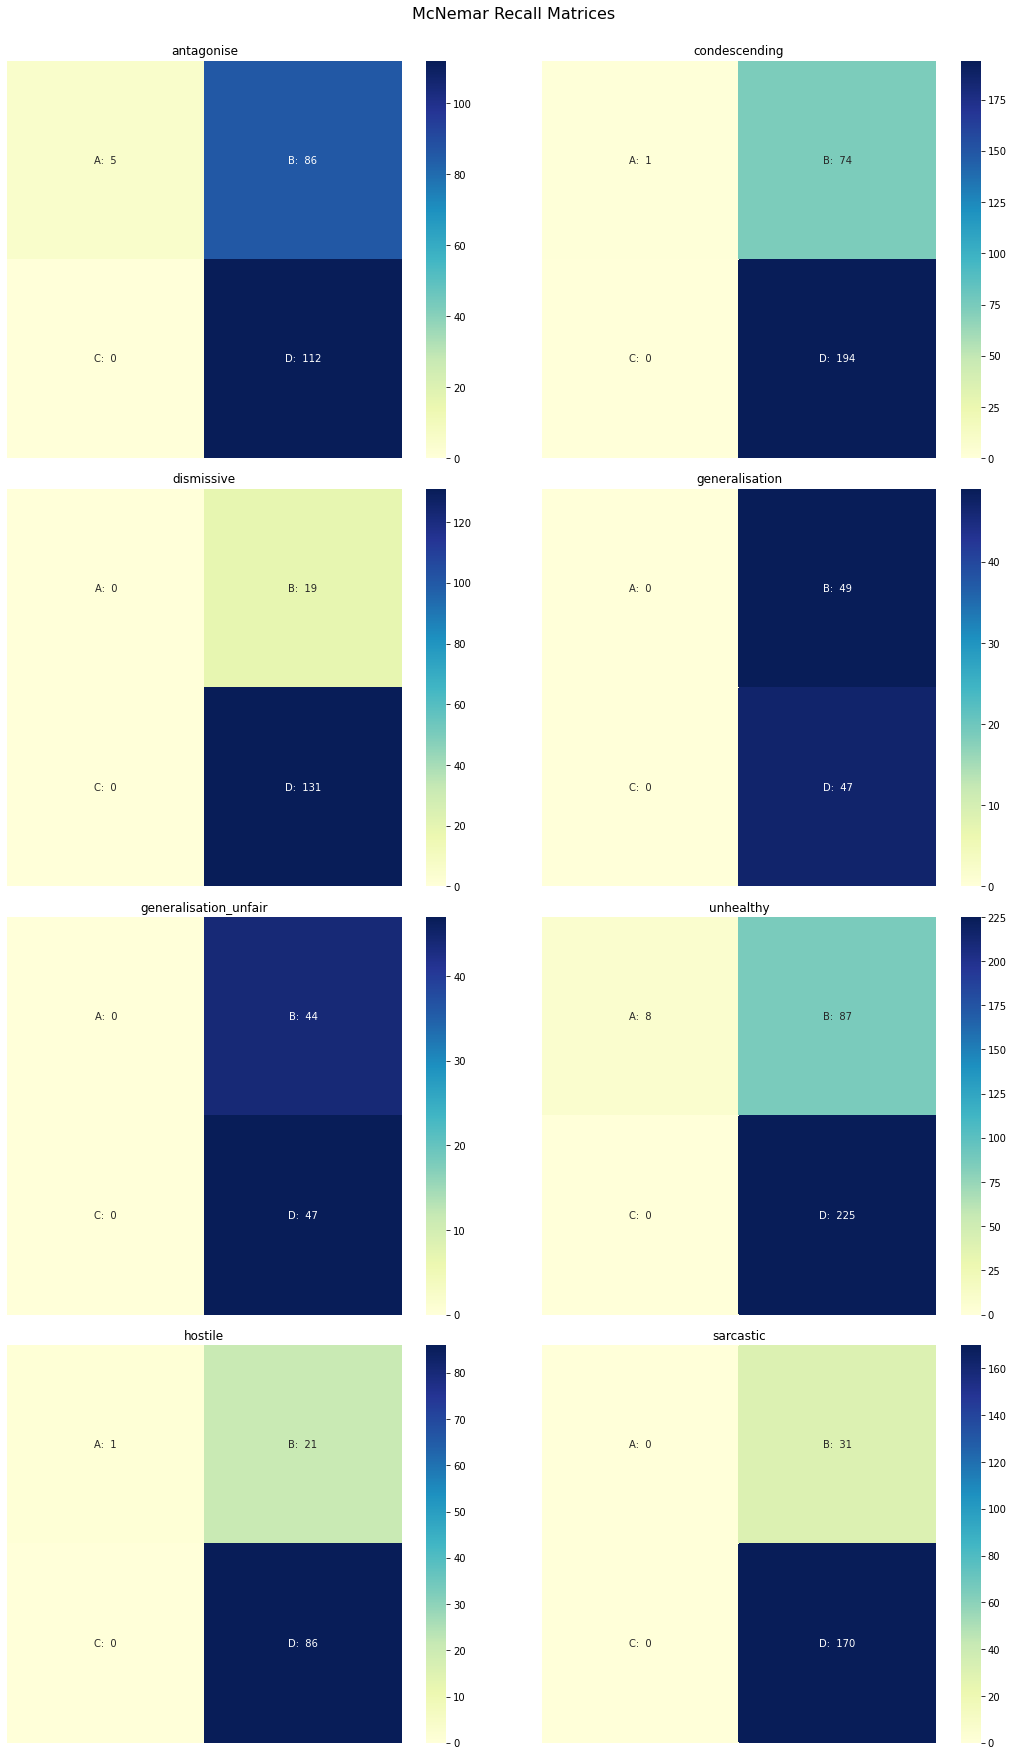

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(4,2, figsize=(15,25))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
for i,(cm,ax) in enumerate(zip(np.array(mcnemar_sensitivities_by_label).reshape(8,2,2),[item for sublist in axes for item in sublist])):
  df_cm = pd.DataFrame(cm)
  labels = ['A: ','B: ','C: ', 'D: ']
  labels = (np.asarray(["{0} {1}".format(string, value) for string, value in zip(labels,cm.flatten())])).reshape(2, 2)
  sns.heatmap(df_cm, annot=labels, fmt="", ax=ax, cmap="YlGnBu", xticklabels=['', ''], yticklabels=['', ''])
  ax.set_title(attributes[i], fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, left=False)
  # ax.set_xlabel('Model 1')
  # ax.set_ylabel('Model 2')
  fig.suptitle('McNemar Recall Matrices', fontsize=16)

In [ ]:
total_mcnemar = np.array(mcnemar_sensitivities_by_label).reshape(8,2,2)
total_mcnemar.sum(axis=0)

array([[  15,  411],
       [   0, 1012]])

<function matplotlib.pyplot.show>

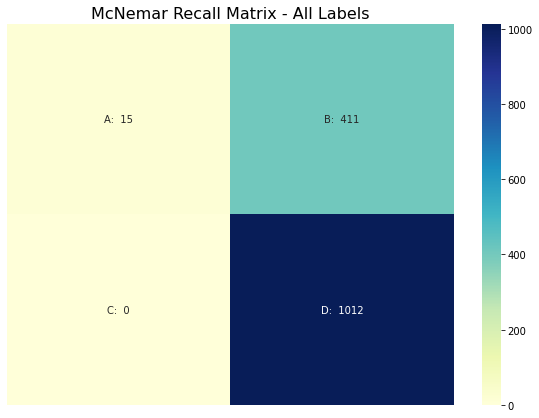

In [ ]:
plt.figure(figsize=(10,7))
cm = total_mcnemar.sum(axis=0)
ax = plt.axes()
df_cm = pd.DataFrame(cm)
labels = ['A: ','B: ','C: ', 'D: ']
labels = (np.asarray(["{0} {1}".format(string, value) for string, value in zip(labels,cm.flatten())])).reshape(2, 2)
sns.heatmap(df_cm, annot=labels, fmt="", ax=ax, cmap="YlGnBu", xticklabels=['', ''], yticklabels=['', ''])
ax.set_title('McNemar Recall Matrix - All Labels', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True, left=False)
plt.show

In [ ]:
print(ucc_bert_labels[attributes].shape)
print(ucc_bert_labels[attributes].sum())
print(ucc_bert_labels[attributes].sum().sum())

(4425, 8)
antagonise               203.0
condescending            269.0
dismissive               150.0
generalisation            96.0
generalisation_unfair     91.0
unhealthy                320.0
hostile                  108.0
sarcastic                201.0
dtype: float64
1438.0


# Precision Recall for UCC RoBERTa VS BERT

In [ ]:
from sklearn.metrics import precision_score, recall_score
plt.figure(figsize=(14,6))
bert_precisions,bert_recalls=[],[]
for i, (attribute,pred) in enumerate(zip(attributes,pred_headers)):
  bert_precisions.append(precision_score(
      np.array(ucc_bert_labels[attribute]).astype(int), np.round(np.array(ucc_bert_labels[pred])).astype(int)))
  bert_recalls.append(recall_score(
      np.array(ucc_bert_labels[attribute]).astype(int), np.round(np.array(ucc_bert_labels[pred])).astype(int)))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1008x432 with 0 Axes>

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=attributes,
    y=bert_precisions,
    name='UCC BERT Precision',
    marker_color='cornflowerblue'
))
fig.add_trace(go.Bar(
    x=attributes,
    y=bert_recalls,
    name='UCC BERT Recall',
    marker_color='indigo'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(title="Unhealthy Comment Corpus (UCC) Attributes")
fig.update_yaxes(title="Score (%)")
fig.update_layout(title='UCC BERT - Precision and Recall')
fig.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
plt.figure(figsize=(14,6))
precisions,recalls=[],[]
for i, (attribute,pred) in enumerate(zip(attributes,pred_headers)):
  precisions.append(precision_score(
      np.array(ucc_bert_labels[attribute]).astype(int), np.round(np.array(ucc_roberta_labels[pred])).astype(int)))
  recalls.append(recall_score(
      np.array(ucc_bert_labels[attribute]).astype(int), np.round(np.array(ucc_roberta_labels[pred])).astype(int)))

<Figure size 1008x432 with 0 Axes>

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=attributes,
    y=precisions,
    name='UCC RoBERTa Precision',
    marker_color='cornflowerblue'
))
fig.add_trace(go.Bar(
    x=attributes,
    y=recalls,
    name='UCC RoBERTa Recall',
    marker_color='indigo'
))


# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_xaxes(title="Unhealthy Comment Corpus (UCC) Attributes")
fig.update_yaxes(title="Score (%)")
fig.update_layout(title='UCC RoBERTa - Precision and Recall')
fig.show()